# Ride Booking Analysis: Customer Satisfaction & Operational Insights
 
**Date:** December 2025  
**Dataset:** 150,000 ride bookings

---

## Executive Summary

This analysis examines ride booking data to identify key drivers of customer satisfaction and operational inefficiencies.

**Key Findings:**
- 38% of rides fail due to cancellations or operational issues, representing **$29M+ in potential lost revenue**
- Pickup time under 3 minutes yields highest satisfaction (4.236/5)
- 21.9% of customer cancellations involve drivers asking customers to cancel (system gaming)
- 2% mechanical breakdown rate causing incomplete rides
- Vehicle type has minimal impact on ratings (all 4.23-4.24/5)

**Revenue Impact:** $47.26M realized from completed rides.

---
## 1. Data Loading & Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rides_pipeline import RideBookings

pd.set_option('display.max_columns', None)

ride = RideBookings()
ride.load_pipeline()
df = ride.df

2026-01-31 11:59:31,076 - rides_pipeline.RideBookings - INFO - CSV file read successfully.
2026-01-31 11:59:31,569 - rides_pipeline.RideBookings - INFO - No exact duplicate rows found.
2026-01-31 11:59:31,792 - rides_pipeline.RideBookings - INFO - Date column contains 0 blank values.
2026-01-31 11:59:31,819 - rides_pipeline.RideBookings - INFO - Time column contains 0 blank values.
2026-01-31 11:59:31,846 - rides_pipeline.RideBookings - INFO - Booking ID column contains 0 blank values.
2026-01-31 11:59:31,868 - rides_pipeline.RideBookings - INFO - Booking Status column contains 0 blank values.
2026-01-31 11:59:31,894 - rides_pipeline.RideBookings - INFO - Customer ID column contains 0 blank values.
2026-01-31 11:59:31,916 - rides_pipeline.RideBookings - INFO - Vehicle Type column contains 0 blank values.
2026-01-31 11:59:31,942 - rides_pipeline.RideBookings - INFO - Pickup Location column contains 0 blank values.
2026-01-31 11:59:31,966 - rides_pipeline.RideBookings - INFO - Drop Locat

---
## 2. Dataset Overview

In [2]:
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print("\nColumns:", df.columns.tolist())

Dataset Shape: (150000, 21)
Total Records: 150,000
Total Features: 21

Columns: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']


In [3]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


### Missing Data Patterns
- 48,000 rides (32%) missing financial data - likely cancelled/incomplete
- 139,500 rides (93%) missing customer cancellation data
- 123,000 rides (82%) missing driver cancellation data
- 57,000 rides (38%) missing ratings

---
## 3. Booking Status Analysis

In [4]:
booking_status = df['Booking Status'].value_counts()
print("Booking Status Distribution:")
print(booking_status)
print(f"\nCompletion Rate: {(booking_status['Completed'] / len(df)) * 100:.1f}%")
print(f"Failure Rate: {((len(df) - booking_status['Completed']) / len(df)) * 100:.1f}%")

Booking Status Distribution:
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

Completion Rate: 62.0%
Failure Rate: 38.0%


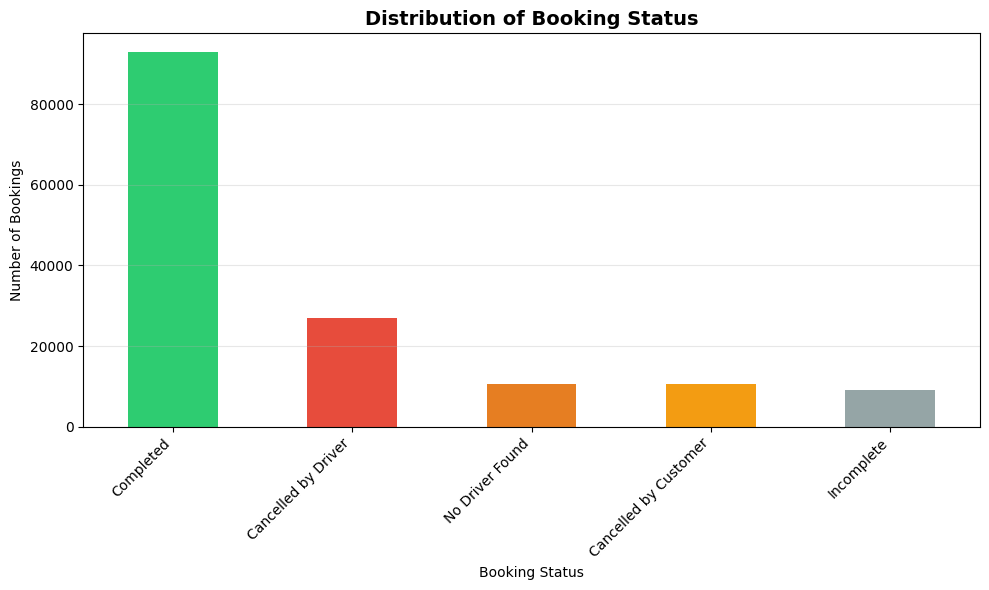

In [5]:
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#e74c3c', '#e67e22', '#f39c12', '#95a5a6']
booking_status.plot(kind='bar', color=colors)
plt.title('Distribution of Booking Status', fontsize=14, fontweight='bold')
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Key Insight: 38% Ride Failure Rate

- **Completed:** 93,000 (62%)
- **Cancelled by Driver:** 27,000 (18%)
- **No Driver Found:** 10,500 (7%)
- **Cancelled by Customer:** 10,500 (7%)
- **Incomplete:** 9,000 (6%)

---
## 4. Customer Satisfaction Metrics

In [6]:
new_df = df[(df['Driver Ratings'].notna()) | (df['Customer Rating'].notna())]
bookings_df = new_df.copy()

print(f"Rides with ratings: {len(bookings_df):,}")
print(f"Average Driver Rating: {bookings_df['Driver Ratings'].mean():.2f}/5.00")
print(f"Average Customer Rating: {bookings_df['Customer Rating'].mean():.2f}/5.00")

Rides with ratings: 93,000
Average Driver Rating: 4.23/5.00
Average Customer Rating: 4.40/5.00


In [7]:
# Impute missing values
bookings_df['Avg VTAT'] = bookings_df.groupby('Vehicle Type')['Avg VTAT'].transform(lambda x: x.fillna(x.median()))
bookings_df['Avg CTAT'] = bookings_df.groupby('Vehicle Type')['Avg CTAT'].transform(lambda x: x.fillna(x.median()))
bookings_df['Hour'] = pd.to_datetime(bookings_df['Time'], format="%H:%M:%S", errors='coerce').dt.hour
bookings_df['Booking Value'] = bookings_df.groupby(['Vehicle Type','Hour'])['Booking Value'].transform(lambda x: x.fillna(x.median()))
bookings_df['Ride Distance'] = bookings_df.groupby(['Vehicle Type','Hour'])['Ride Distance'].transform(lambda x: x.fillna(x.median()))
print("Data preparation complete.")

Data preparation complete.


Average Driver Rating by Vehicle Type:
Vehicle Type
Uber XL          4.238340
Premier Sedan    4.234865
Auto             4.232369
Go Sedan         4.231812
Bike             4.230056
Go Mini          4.227694
eBike            4.225614
Name: Driver Ratings, dtype: float64


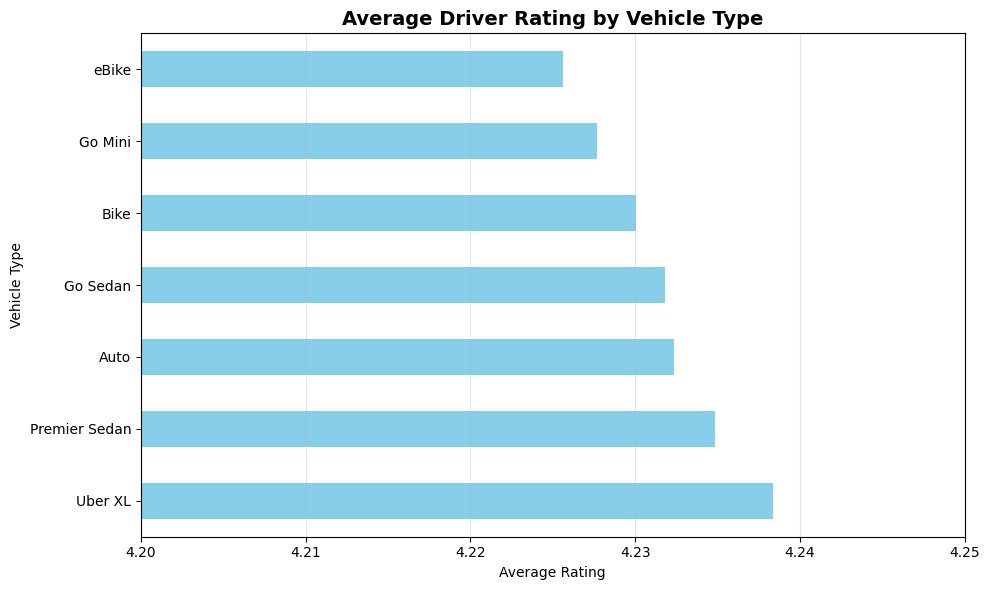

In [8]:
avg_ratings_vehicle = bookings_df.groupby('Vehicle Type')['Driver Ratings'].mean().sort_values(ascending=False)
print("Average Driver Rating by Vehicle Type:")
print(avg_ratings_vehicle)

plt.figure(figsize=(10, 6))
avg_ratings_vehicle.plot(kind='barh', color='skyblue')
plt.title('Average Driver Rating by Vehicle Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Vehicle Type')
plt.xlim(4.20, 4.25)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Key Insight: Vehicle Type Has Minimal Impact
All vehicle types cluster around 4.23-4.24, suggesting driver behavior matters more than vehicle type.

---
## 5. Pickup Time Impact on Ratings

In [9]:
bins = np.linspace(0, bookings_df['Avg VTAT'].max(), 6)
bookings_df['VTAT_bin'] = pd.cut(bookings_df['Avg VTAT'], bins)
avg_rating_per_bin = bookings_df.groupby('VTAT_bin')['Driver Ratings'].mean()
print("Average Rating by Pickup Time:")
print(avg_rating_per_bin)

Average Rating by Pickup Time:
VTAT_bin
(0.0, 3.0]      4.235679
(3.0, 6.0]      4.233155
(6.0, 9.0]      4.229395
(9.0, 12.0]     4.234031
(12.0, 15.0]    4.225678
Name: Driver Ratings, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_13572\1440469799.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_per_bin = bookings_df.groupby('VTAT_bin')['Driver Ratings'].mean()


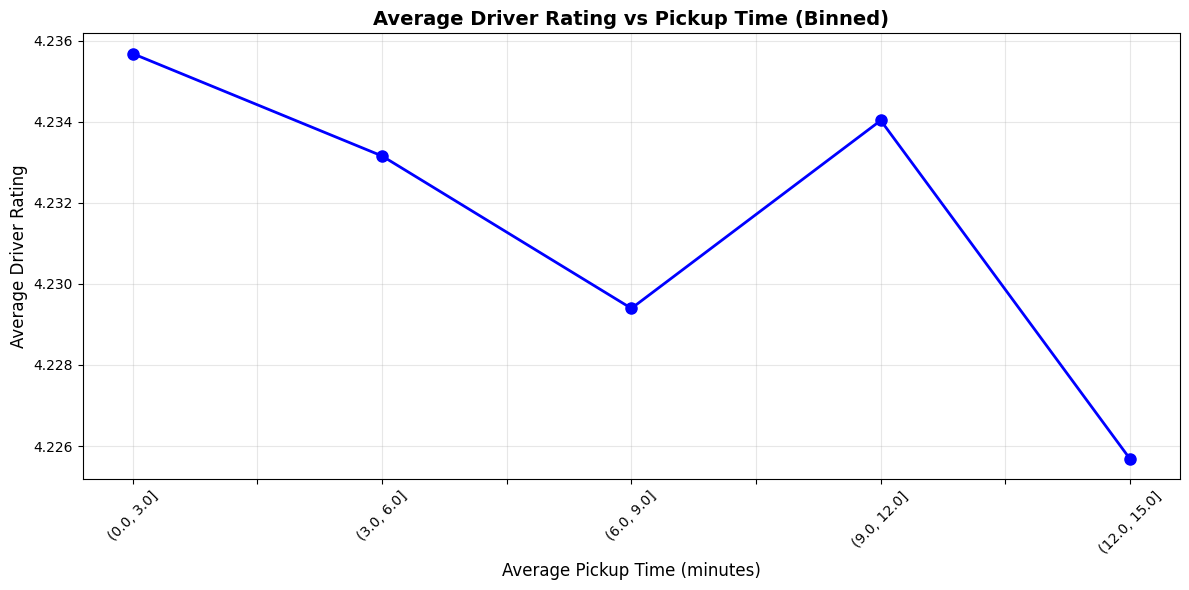

In [10]:
plt.figure(figsize=(12, 6))
avg_rating_per_bin.plot(marker='o', color='blue', linewidth=2, markersize=8)
plt.xlabel('Average Pickup Time (minutes)', fontsize=12)
plt.ylabel('Average Driver Rating', fontsize=12)
plt.title('Average Driver Rating vs Pickup Time (Binned)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Critical Findings:

1. **0-3 minutes:** Highest (4.236) - exceeds expectations
2. **6-9 minutes:** Drop (4.229) - frustration zone
3. **9-12 minutes:** Recovery (4.234) - adjusted expectations
4. **12-15 minutes:** Lowest (4.226) - patience exhausted

**Strategy:** Target sub-3 minute pickups in high-density areas.

---
## 6. Trip Duration Impact

In [11]:
bins = [0, 5, 10, 20, 30, 45]
labels = ['0–5', '5–10', '10–20', '20–30', '30–45']
bookings_df['CTAT_bin'] = pd.cut(bookings_df['Avg CTAT'], bins=bins, labels=labels, include_lowest=True)
avg_rating_ctat = bookings_df.groupby('CTAT_bin')['Driver Ratings'].mean()
print("Average Rating by Trip Duration:")
print(avg_rating_ctat)
print("\nSample Size per Bin:")
print(bookings_df['CTAT_bin'].value_counts().sort_index())

Average Rating by Trip Duration:
CTAT_bin
0–5           NaN
5–10          NaN
10–20    4.231116
20–30    4.230941
30–45    4.230986
Name: Driver Ratings, dtype: float64

Sample Size per Bin:
CTAT_bin
0–5          0
5–10         0
10–20    15481
20–30    31030
30–45    46489
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13572\2069019990.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_ctat = bookings_df.groupby('CTAT_bin')['Driver Ratings'].mean()


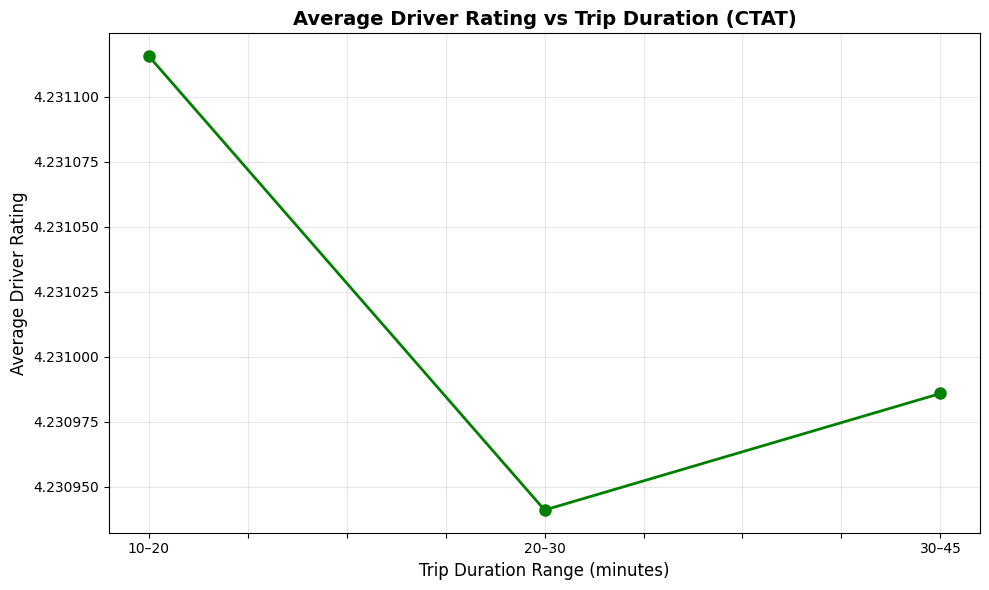

In [12]:
plt.figure(figsize=(10, 6))
avg_rating_ctat.plot(marker='o', color='green', linewidth=2, markersize=8)
plt.title("Average Driver Rating vs Trip Duration (CTAT)", fontsize=14, fontweight='bold')
plt.xlabel("Trip Duration Range (minutes)", fontsize=12)
plt.ylabel("Average Driver Rating", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Key Insight: Trip Duration Doesn't Matter
Variation is only 0.0002 points. Customers judge rides on pickup experience and driver behavior, not trip length.

---
## 7. Customer Cancellation Analysis

In [13]:
cancellation_reasons_customer = df[df['Reason for cancelling by Customer'].notna()]
reasons_customer = cancellation_reasons_customer['Reason for cancelling by Customer'].value_counts()
print("Customer Cancellation Reasons:")
print(reasons_customer)
print(f"\nTotal: {len(cancellation_reasons_customer):,}")

Customer Cancellation Reasons:
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

Total: 10,500


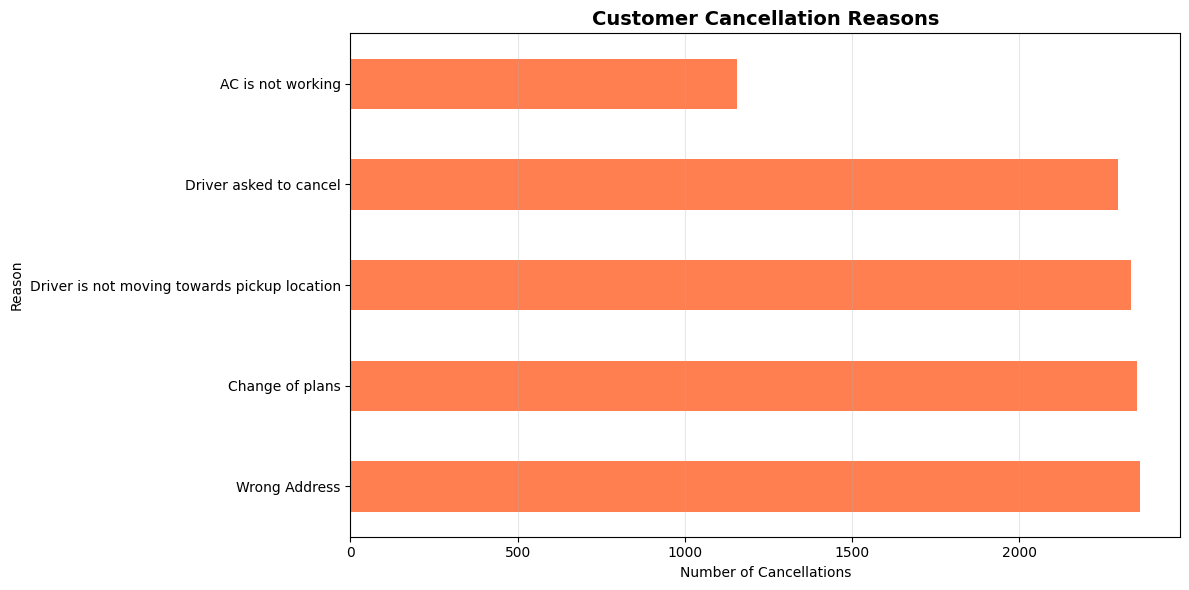

In [14]:
plt.figure(figsize=(12, 6))
reasons_customer.plot(kind='barh', color='coral')
plt.title('Customer Cancellation Reasons', fontsize=14, fontweight='bold')
plt.xlabel('Number of Cancellations')
plt.ylabel('Reason')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13572\2766248450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_reasons_customer['Hour'] = pd.to_datetime(cancellation_reasons_customer['Time'], format="%H:%M:%S", errors='coerce').dt.hour


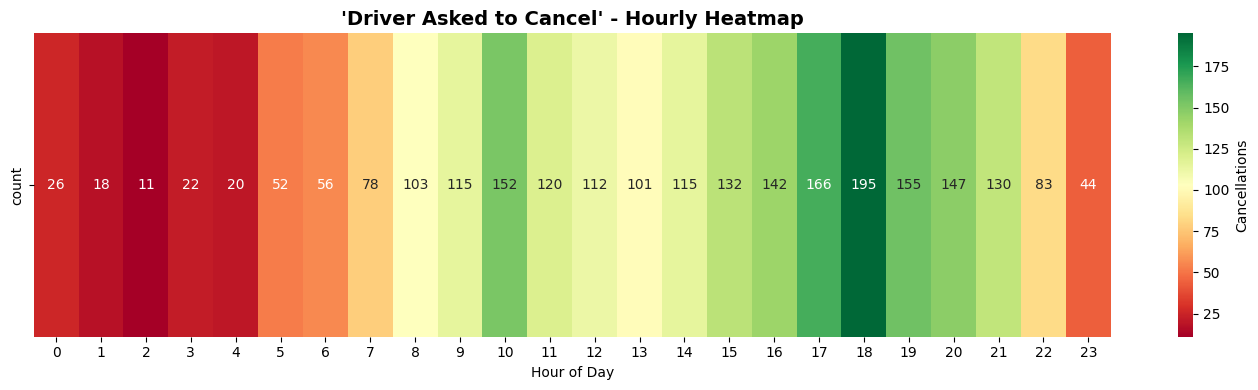

In [15]:
cancellation_reasons_customer['Hour'] = pd.to_datetime(cancellation_reasons_customer['Time'], format="%H:%M:%S", errors='coerce').dt.hour
drivers_asked_to_cancel = cancellation_reasons_customer[cancellation_reasons_customer['Reason for cancelling by Customer'] == 'Driver asked to cancel']
hp_df = drivers_asked_to_cancel['Hour'].value_counts().sort_index().to_frame()

plt.figure(figsize=(14, 4))
sns.heatmap(hp_df.T, annot=True, fmt='d', cmap='RdYlGn', cbar_kws={'label': 'Cancellations'})
plt.title("'Driver Asked to Cancel' - Hourly Heatmap", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()

### Critical Issue: Driver Gaming (21.9% of cancellations)

**Peak Hours:**
- 17-18h: 195-166 cancellations (cherry-picking profitable rides)
- 20-23h: 147-130 (avoiding shift penalties)
- 0-5h: 26-52 (unprofitable rides)

**Actions:** Detection algorithms, equal penalties, peak monitoring, customer education.

---
## 8. Driver Cancellation Patterns

In [16]:
cancellation_reasons_driver = df[df['Driver Cancellation Reason'].notna()]
reasons_driver = cancellation_reasons_driver['Driver Cancellation Reason'].value_counts()
print("Driver Cancellation Reasons:")
print(reasons_driver)
print(f"\nTotal: {len(cancellation_reasons_driver):,}")

Driver Cancellation Reasons:
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

Total: 27,000


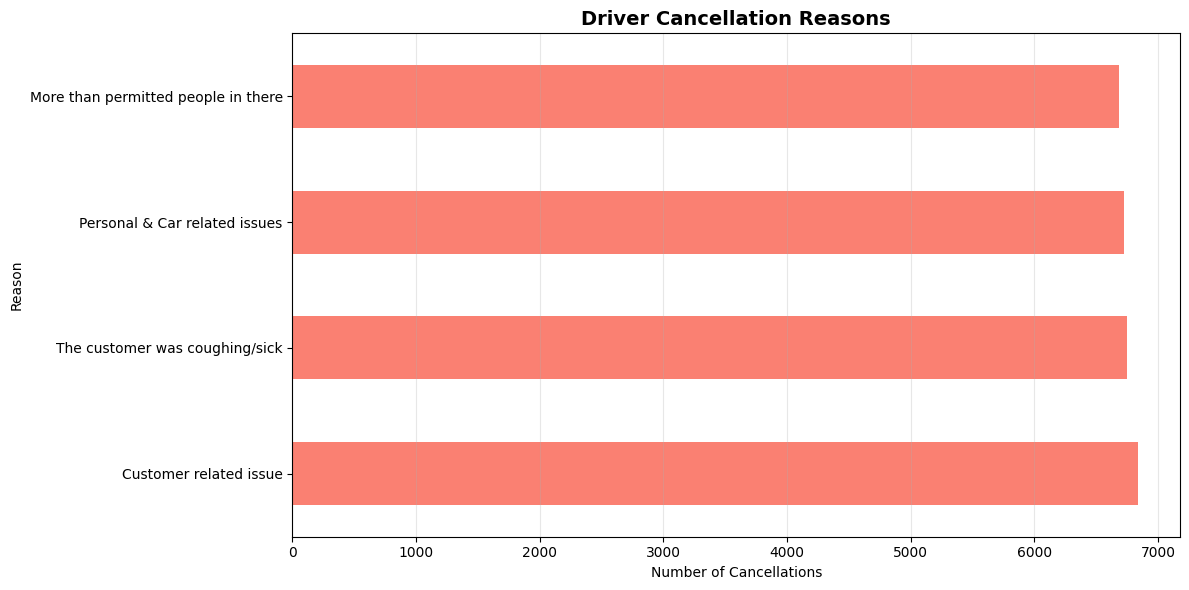

In [17]:
plt.figure(figsize=(12, 6))
reasons_driver.plot(kind='barh', color='salmon')
plt.title('Driver Cancellation Reasons', fontsize=14, fontweight='bold')
plt.xlabel('Number of Cancellations')
plt.ylabel('Reason')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis
Even distribution (~25% each): Customer-related (25.3%), Sick customer (25%), Car issues (24.9%), Excess passengers (24.8%)

---
## 9. Vehicle Type Analysis

In [18]:
reasons_for_cancelling_per_vehicle = cancellation_reasons_customer[['Vehicle Type','Reason for cancelling by Customer']].value_counts()
df_plot = reasons_for_cancelling_per_vehicle.reset_index(name='Count').pivot(index='Vehicle Type', columns='Reason for cancelling by Customer', values='Count').fillna(0)
print("Cancellations by Vehicle Type:")
print(df_plot)

Cancellations by Vehicle Type:
Reason for cancelling by Customer  AC is not working  Change of plans  \
Vehicle Type                                                            
Auto                                             0.0            719.0   
Bike                                             0.0            390.0   
Go Mini                                        457.0            388.0   
Go Sedan                                       356.0            385.0   
Premier Sedan                                  265.0            220.0   
Uber XL                                         77.0             71.0   
eBike                                            0.0            180.0   

Reason for cancelling by Customer  Driver asked to cancel  \
Vehicle Type                                                
Auto                                                627.0   
Bike                                                387.0   
Go Mini                                             403.0   
Go Sed

<Figure size 1400x700 with 0 Axes>

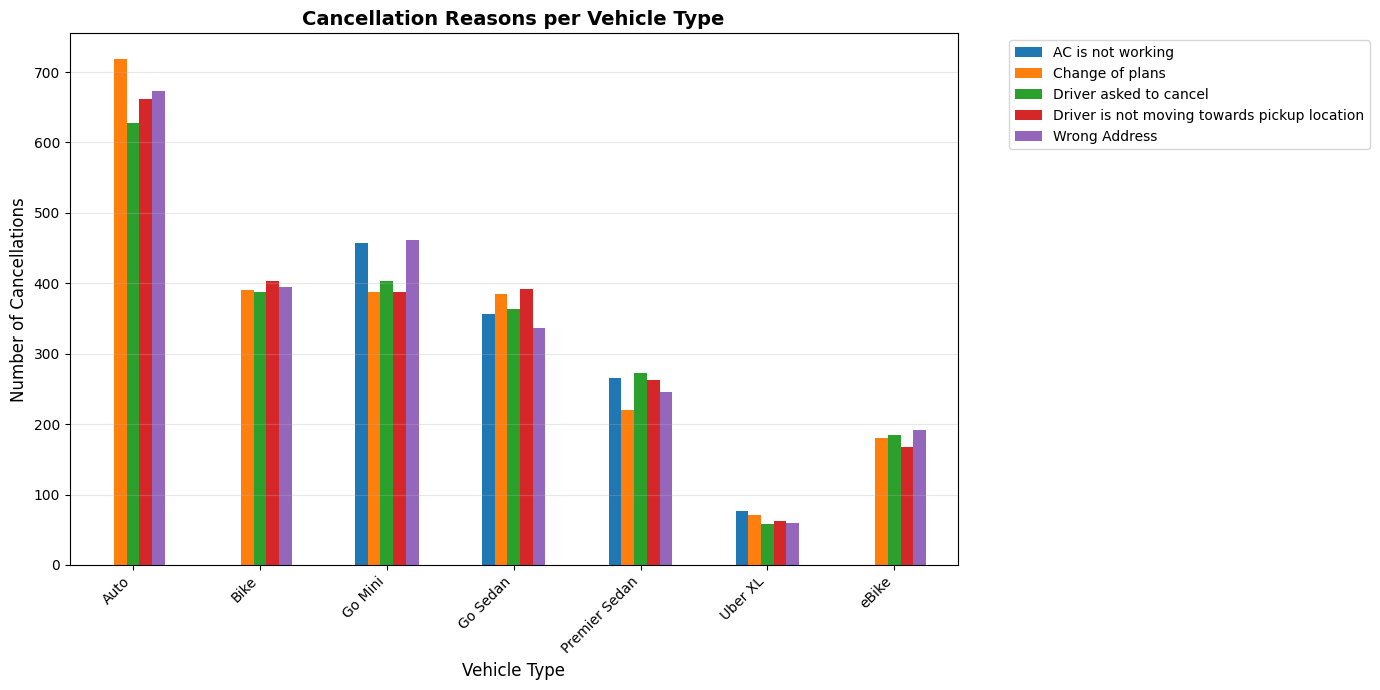

In [19]:
plt.figure(figsize=(14, 7))
df_plot.plot(kind='bar', figsize=(14, 7))
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Cancellations", fontsize=12)
plt.title("Cancellation Reasons per Vehicle Type", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Key Findings
- **Auto:** 3,400 cancellations (impulsive bookings)
- **Go Mini:** 460 AC complaints (critical issue)
- **Premium Sedan:** 260 AC issues (unacceptable)

---
## 10. Incomplete Rides Analysis

In [20]:
incomplete_rides = df[df['Incomplete Rides'].notna()]
reasons = incomplete_rides['Incomplete Rides Reason'].value_counts()
print("Incomplete Ride Reasons:")
print(reasons)
print(f"\nTotal: {len(incomplete_rides):,} ({(len(incomplete_rides)/len(df))*100:.2f}%)")

Incomplete Ride Reasons:
Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64

Total: 9,000 (6.00%)


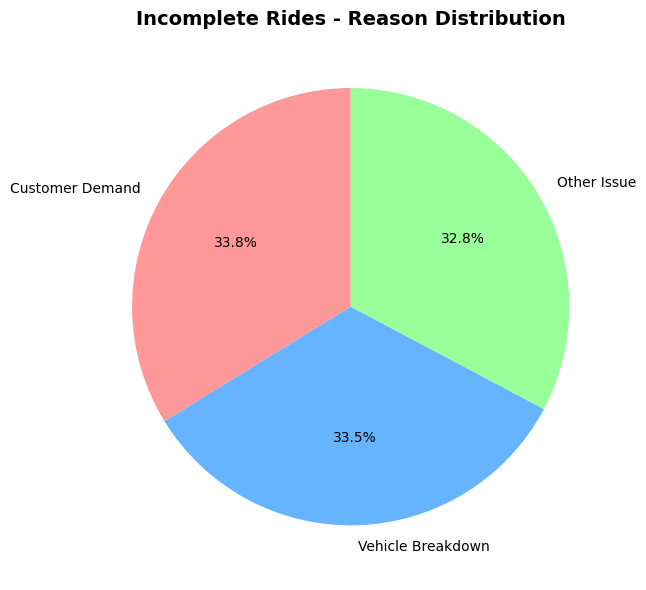

In [21]:
plt.figure(figsize=(10, 6))
reasons.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Incomplete Rides - Reason Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Critical Issue: 2% Vehicle Breakdown Rate

**9,000 incomplete rides:**
- Customer Demand: 3,040 (33.8%)
- Vehicle Breakdown: 3,012 (33.5%) - **4x industry standard**
- Other Issue: 2,948 (32.7%)

**Actions:** Fleet audit, predictive maintenance, better categorization.

---
## 11. Revenue Analysis

In [23]:
completed_rides = df[(df['Incomplete Rides'].isna()) & (df['Booking Value'].notna())]
total_revenue = completed_rides['Booking Value'].sum()

print(f"Total Revenue: ${total_revenue:,.0f}")
print(f"Completed Rides: {len(completed_rides):,}")
print(f"Average Booking Value: ${completed_rides['Booking Value'].mean():.2f}")

Total Revenue: $47,260,574
Completed Rides: 93,000
Average Booking Value: $508.18


In [24]:
completion_rate = len(completed_rides) / len(df)
failure_rate = 1 - completion_rate
avg_booking_value = completed_rides['Booking Value'].mean()
failed_bookings = len(df) - len(completed_rides)
potential_lost_revenue = failed_bookings * avg_booking_value

print(f"\n--- Revenue Opportunity ---")
print(f"Completion Rate: {completion_rate:.1%}")
print(f"Failure Rate: {failure_rate:.1%}")
print(f"Failed Bookings: {failed_bookings:,}")
print(f"Potential Lost Revenue: ${potential_lost_revenue:,.0f}")
print(f"\nIf failure rate reduced to 20%:")
print(f"Revenue Recovery: ${(failed_bookings * 0.47 * avg_booking_value):,.0f}")


--- Revenue Opportunity ---
Completion Rate: 62.0%
Failure Rate: 38.0%
Failed Bookings: 57,000
Potential Lost Revenue: $28,966,158

If failure rate reduced to 20%:
Revenue Recovery: $13,614,094


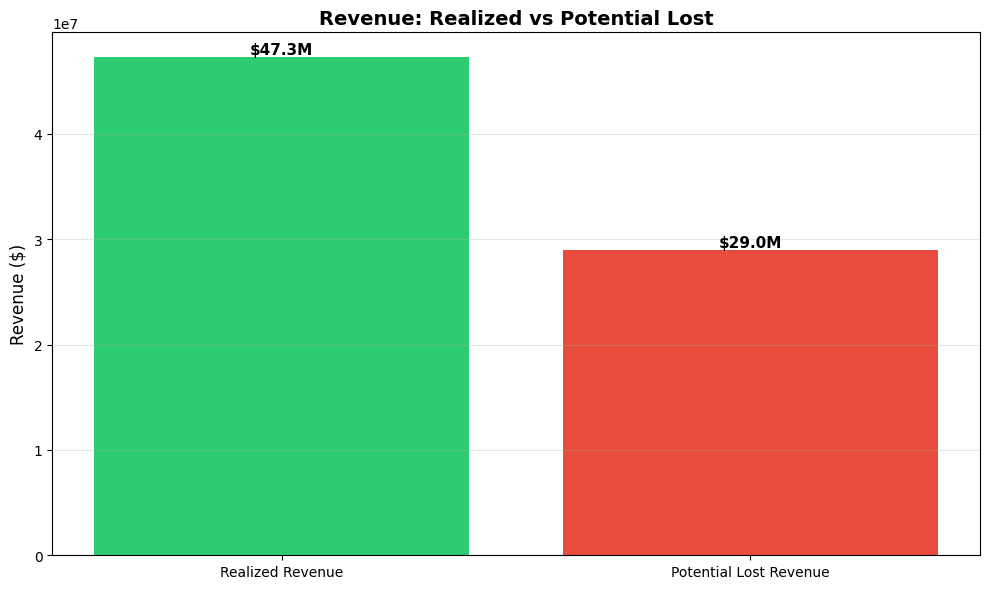

In [26]:
revenue_data = {'Realized Revenue': total_revenue, 'Potential Lost Revenue': potential_lost_revenue}

plt.figure(figsize=(10, 6))
plt.bar(revenue_data.keys(), revenue_data.values(), color=['#2ecc71', '#e74c3c'])
plt.title('Revenue: Realized vs Potential Lost', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12)
for i, (k, v) in enumerate(revenue_data.items()):
    plt.text(i, v, f'${v/1e6:.1f}M', ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Revenue Recovery Opportunity
- Realized: \$47.26M
- Potential Lost: \$29M+
- If failure rate reduced 38%→20%: **\$13.6M recovery**
- Each 1% improvement = \$753K

---
## 12. Conclusions & Recommendations

### Key Findings Summary

**1. Operational Crisis**
- 38% ride failure rate = $29M+ lost revenue
- 2% breakdown rate (4x industry standard)
- 21.9% gaming (drivers ask customers to cancel)

**2. Satisfaction Insights**
- Overall 4.23/5 (improvable)
- Pickup time > trip duration for satisfaction
- Sub-3 min pickups = highest rating (4.236)
- Vehicle type minimal impact (4.23-4.24)

**3. Critical Time Windows**
- Peak gaming: 5-7 PM (cherry-picking)
- Late evening: 8-11 PM (shift avoidance)
- Early morning: 12-5 AM (low demand)

---

### Strategic Recommendations

#### Immediate (0-30 Days)
1. **Combat Driver Gaming**
   - Detection algorithms
   - Equal penalties for driver-requested cancellations
   - Peak hour monitoring (5-7 PM)

2. **Fleet Maintenance Blitz**
   - Go Mini AC inspection (460 complaints)
   - Zero-tolerance AC policy for premium
   - Target: 2% → <0.5% breakdown rate

3. **Data Quality**
   - Better categorization of "Other Issue"
   - Investigate missing <10 min rides

#### Short-term (1-3 Months)
1. **Optimize Pickup Experience**
   - Incentives for sub-3 min pickups
   - Proactive 6-9 min ETA communication
   - Real-time accuracy improvements

2. **Auto Strategy**
   - Shorter cancellation windows
   - Small cancellation fees
   - Deposit for repeat cancellers

3. **Incomplete Rides Protocol**
   - Partial payment collection
   - Compensation strategy
   - Better incident tracking

#### Long-term (3-6 Months)
1. **Revenue Recovery: 38% → 20% ($13.6M)**
   - Driver cancellations: 18% → 10%
   - No Driver Found: 7% → 3%
   - Incomplete rides: 6% → 3%

2. **Predictive Maintenance**
   - IoT vehicle monitoring
   - Breakdown prediction
   - Mandatory pre-shift checks

3. **Premium Strategy Reevaluation**
   - Focus on comfort messaging (not service)
   - Zero AC issues guarantee
   - Priority matching peak hours

4. **Driver Quality Program**
   - Behavior training over vehicle upgrades
   - Pickup speed training
   - Communication best practices

---

### KPIs to Track

| Metric | Current | Target (6mo) | Impact |
|--------|---------|--------------|--------|
| Ride Completion Rate | 62% | 80% | +\$13.6M |
| Sub-3 Min Pickup Rate | Unknown | 25% | +0.01 rating |
| Breakdown Rate | 2.0% | 0.5% | -1.5% incomplete |
| Driver Gaming | 2,295/yr | 500/yr | -78% abuse |
| Go Mini AC Complaints | 460 | 50 | -89% issues |
| Driver Cancellation | 18% | 10% | +\$6M |
| Average Rating | 4.23 | 4.35 | +2.8% satisfaction |

---

### Bottom Line

Solid foundation (4.23 ratings, $47.26M revenue) but **38% failure rate = enormous opportunity**.

**Biggest opportunities are operational:**
- Fix vehicle reliability (2% breakdown)
- Combat system gaming (21.9% cancellations)
- Focus on first 3 minutes
- Driver behavior > Vehicle type

**Expected Impact:** $13.6M+ annual recovery + 2.8% satisfaction improvement (4.23 → 4.35).

**Path to growth: Operational excellence drives both satisfaction and revenue.**

---
## Appendix: Technical Details

### Methodology
- Filtered to 93,000 rides with ratings
- Median imputation by Vehicle Type for VTAT/CTAT
- Median imputation by Vehicle Type + Hour for Booking Value/Distance
- Binned analysis for continuous variables
- Time-series heatmap for hourly patterns

### Tools
- Python 3.x, pandas, numpy, matplotlib, seaborn
- Custom RideBookings pipeline

### Data Quality Notes
**Strengths:** 150K bookings, 21 features, good temporal coverage

**Limitations:** No rides <10 min, even driver cancellation distribution, 33% "Other Issue"


---

*Portfolio project demonstrating: EDA, Business Intelligence, Data Visualization, Statistical Analysis, Strategic Recommendations*